In [12]:
import xarray as xr
import matplotlib.pylab as plt
import numpy as np
import proplot as plot

In [13]:
ds_duacs = xr.open_dataset('/home/mballarotta/OSE_psd/psd_OSE_GULFSTREAM_DUACS_2017-01-01-2017-12-31_c2_vxxc.nc')
ds_MIOST = xr.open_dataset('/home/mballarotta/OSE_psd/psd_OSE_GULFSTREAM_MIOST_2017-01-01-2017-12-31_c2_vxxc.nc')
ds_DYMOST_STATIC = xr.open_dataset('/home/mballarotta/OSE_psd/psd_OSE_GULFSTREAM_DYMOST_STATIC_2017-01-01-2017-12-31_c2_vxxc.nc')
ds_DYMOST_DYNAMIC = xr.open_dataset('/home/mballarotta/OSE_psd/psd_OSE_GULFSTREAM_DYMOST_DYNAMIC_2017-01-01-2017-12-31_c2_vxxc.nc')
ds_DYMOST_DYNAMIC_1_8 = xr.open_dataset('/home/mballarotta/OSE_psd/psd_OSE_GULFSTREAM_DYMOST_DYNAMIC_1_8_2017-01-01-2017-12-31_c2_vxxc.nc')  # dynamic grid spacing 1/8
ds_FPGENN = xr.open_dataset('/home/mballarotta/OSE_psd/psd_OSE_GULFSTREAM_FP-GENN_2017-01-01-2017-12-31_c2_vxxc.nc')
ds_BFN = xr.open_dataset('/home/mballarotta/OSE_psd/psd_OSE_GULFSTREAM_BFN_2017-01-01-2017-12-31_c2_vxxc.nc')
ds_BFN_v0 = xr.open_dataset('/home/mballarotta/OSE_psd/psd_OSE_GULFSTREAM_BFN_v0_2017-01-01-2017-12-31_c2_vxxc.nc')

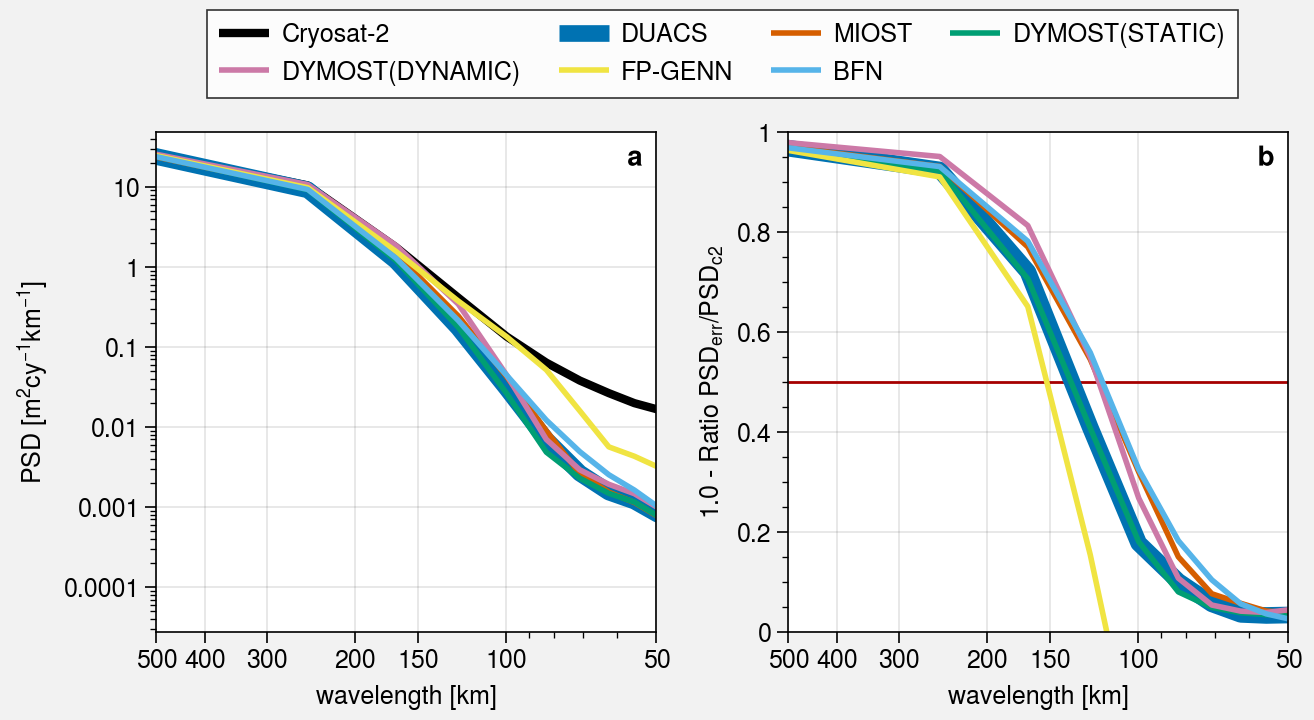

In [33]:
plot.rc['savefig.transparent']=False

fig, axs = plot.subplots(ncols=2, share=False)
axs.format(xlabel='wavelength [km]', grid=True, abc=True, abcloc='ur', xlim=(50, 500), xscale='log', xlocator=[50, 100, 150, 200, 300, 400, 500])
    
p1 = axs[0].plot(1./ds_duacs.wavenumber, ds_duacs.psd_ref.values, label='Cryosat-2', color='k', lw=3)#, legend='ll', legend_kw={'ncol': 1})

p2 = axs[0].plot(1./ds_duacs.wavenumber, ds_duacs.psd_study.values, label='DUACS', lw=6)#, legend='ll', legend_kw={'ncol': 1})

p3 = axs[0].plot(1./ds_MIOST.wavenumber, ds_MIOST.psd_study.values, label='MIOST', lw=2)#, legend='ll', legend_kw={'ncol': 1})

p4 = axs[0].plot(1./ds_DYMOST_STATIC.wavenumber, ds_DYMOST_STATIC.psd_study.values, label='DYMOST(STATIC)', lw=2)#, legend='ll', legend_kw={'ncol': 1})

p5 = axs[0].plot(1./ds_DYMOST_DYNAMIC.wavenumber, ds_DYMOST_DYNAMIC.psd_study.values, label='DYMOST(DYNAMIC)', lw=2)#, legend='ll', legend_kw={'ncol': 1})

p6 = axs[0].plot(1./ds_FPGENN.wavenumber, ds_FPGENN.psd_study.values, label='FP-GENN', lw=2)#, legend='ll', legend_kw={'ncol': 1})

p7 = axs[0].plot(1./ds_BFN_v0.wavenumber, ds_BFN_v0.psd_study.values, label='BFN', lw=2)#, legend='ll', legend_kw={'ncol': 1})

fig.legend([p1, p2, p3, p4, p5, p6, p7], ncols=4, loc='t')

axs[0].format(ylabel='PSD [m$^{2}$cy$^{-1}$km$^{-1}$]', yscale='log')

c2 = plot.scale_luminance('red', 0.5)

axs[1].plot(1./ds_duacs.wavenumber, 1. - ds_duacs.psd_diff/ds_duacs.psd_ref, label='DUACS', lw=6)#, legend='ll', legend_kw={'ncol': 1})

axs[1].plot(1./ds_MIOST.wavenumber, 1. - ds_MIOST.psd_diff/ds_MIOST.psd_ref, label='MIOST', lw=2)#, legend='ll', legend_kw={'ncol': 1})

axs[1].plot(1./ds_DYMOST_STATIC.wavenumber, 1. - ds_DYMOST_STATIC.psd_diff/ ds_DYMOST_STATIC.psd_ref, label='DYMOST(STATIC)', lw=2)#, legend='ll', legend_kw={'ncol': 1})

axs[1].plot(1./ds_DYMOST_DYNAMIC.wavenumber, 1. - ds_DYMOST_DYNAMIC.psd_diff/ds_DYMOST_DYNAMIC.psd_ref, label='DYMOST(DYNAMIC)', lw=2)#, legend='ll', legend_kw={'ncol': 1})

axs[1].plot(1./ds_FPGENN.wavenumber, 1. - ds_FPGENN.psd_diff/ds_FPGENN.psd_ref,  label='FP-GENN', lw=2)#, legend='ll', legend_kw={'ncol': 1})

axs[1].plot(1./ds_BFN_v0.wavenumber, 1. - ds_BFN_v0.psd_diff/ds_BFN_v0.psd_ref, label='BFN', lw=2)#, legend='ll', legend_kw={'ncol': 1})

axs[1].format(ylabel='1.0 - Ratio PSD$_{err}$/PSD$_{c2}$', ylim=(0, 1))

axs[1].hlines(y=0.5, xmin=20, xmax=500, lw=1, color=c2)

plt.savefig('/home/mballarotta/OSE_psd/psd_OSE.png')
